In [109]:
%matplotlib inline

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
df = pd.read_csv('../fair_regression/save_temporary_results.csv')
del df['Unnamed: 0']

In [111]:
# I forgot to include a place for the value of the penalty weight, so get it from ID string now
import re

def get_penalty(s):
    my_re = re.match('.*pen:\s(\d.*)\stype.*', s)
    val = float(my_re.group(1))
    return val

if 'l_fair' not in df:
    df['l_fair'] = df['ID_String'].apply(get_penalty)
ID_strings = df['ID_String']

num_cols = ['Group Penalty', 'Individual Penalty', 'MSE', 'Score', 'l_fair']
df[num_cols] = df[num_cols].apply(pd.to_numeric)

In [112]:
mean_df = df.groupby(['Type', 'l_fair'], as_index=False).agg({'Individual Penalty': np.mean,
                                                              'Group Penalty': np.mean,
                                                              'MSE': np.mean,
                                                              'Score': np.mean})
std_df = df.groupby(['Type', 'l_fair'], as_index=False).agg({'Individual Penalty': np.std,
                                                             'Group Penalty': np.std,
                                                             'MSE': np.std,
                                                             'Score': np.std})

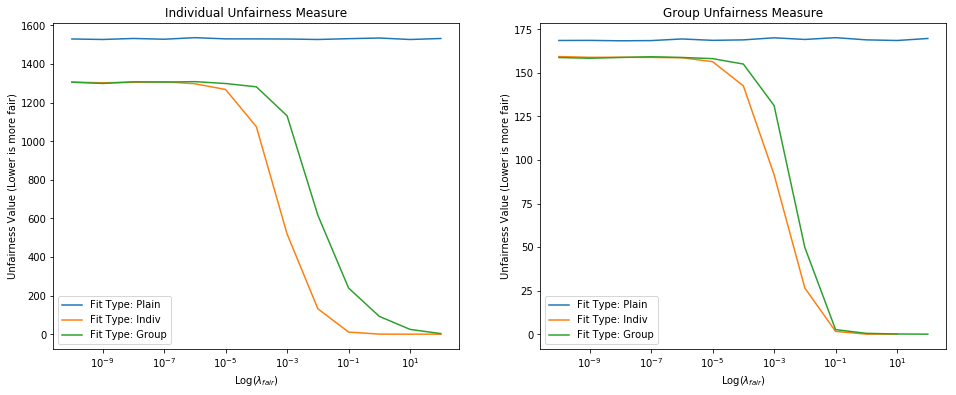

In [113]:
fig = plt.figure(figsize=(16, 6))
ax_i = fig.add_subplot(121)
ax_g = fig.add_subplot(122)
# ax_p = fig.add_subplot(133)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax_i.set_title('Individual Unfairness Measure')
ax_i.set_xlabel('Log($\lambda_{fair}$)')
ax_i.set_ylabel('Unfairness Value (Lower is more fair)')

ax_g.set_title('Group Unfairness Measure')
ax_g.set_xlabel('Log($\lambda_{fair}$)')
ax_g.set_ylabel('Unfairness Value (Lower is more fair)')

ax_i.semilogx(df_p['l_fair'], df_p['Individual Penalty'], label='Fit Type: Plain')
ax_i.semilogx(df_i['l_fair'], df_i['Individual Penalty'], label='Fit Type: Indiv')
ax_i.semilogx(df_g['l_fair'], df_g['Individual Penalty'], label='Fit Type: Group')
ax_i.legend()

ax_g.semilogx(df_p['l_fair'], df_p['Group Penalty'], label='Fit Type: Plain')
ax_g.semilogx(df_i['l_fair'][:-1], df_i['Group Penalty'][:-1], label='Fit Type: Indiv')
# ax_g.semilogx(df_i['l_fair'], df_i['Group Penalty'], label='Fit Type: Indiv')
ax_g.semilogx(df_g['l_fair'], df_g['Group Penalty'], label='Fit Type: Group')
ax_g.legend()


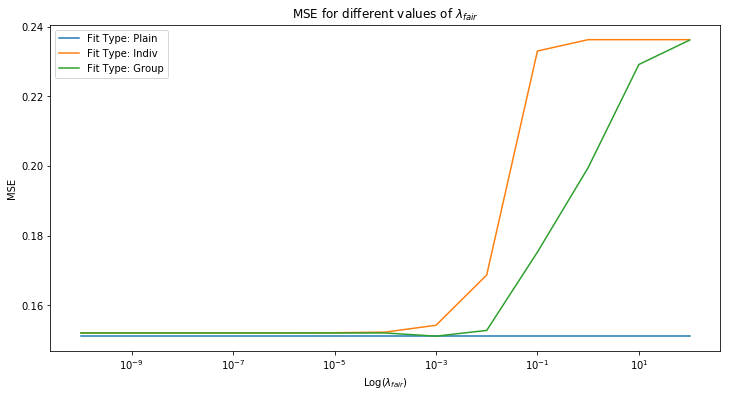

In [114]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax.set_title('MSE for different values of $\lambda_{fair}$')
ax.set_xlabel('Log($\lambda_{fair}$)')
ax.set_ylabel('MSE')

ax.semilogx(df_p['l_fair'], df_p['MSE'], label='Fit Type: Plain')
ax.semilogx(df_i['l_fair'], df_i['MSE'], label='Fit Type: Indiv')
ax.semilogx(df_g['l_fair'], df_g['MSE'], label='Fit Type: Group')
ax.legend()

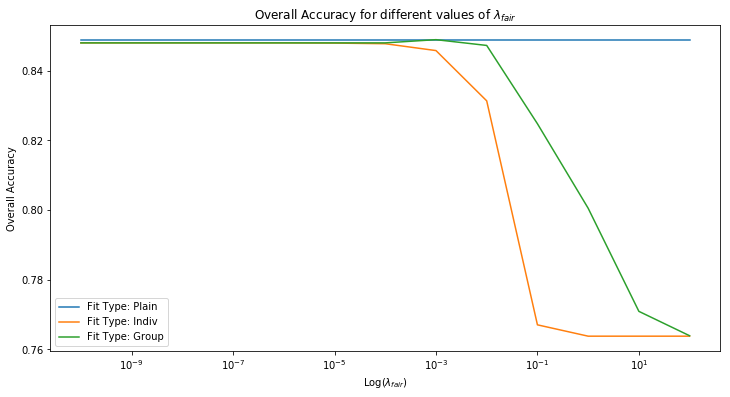

In [115]:
fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

df_p = mean_df[mean_df['Type'] == 'Plain']
df_i = mean_df[mean_df['Type'] == 'Individual']
df_g = mean_df[mean_df['Type'] == 'Group']

ax.set_title('Overall Accuracy for different values of $\lambda_{fair}$')
ax.set_xlabel('Log($\lambda_{fair}$)')
ax.set_ylabel('Overall Accuracy')

ax.semilogx(df_p['l_fair'], df_p['Score'], label='Fit Type: Plain')
ax.semilogx(df_i['l_fair'], df_i['Score'], label='Fit Type: Indiv')
ax.semilogx(df_g['l_fair'], df_g['Score'], label='Fit Type: Group')
ax.legend()

In [119]:
# Open the prediction csv file
import sys
sys.path.append('../fair_regression')

import pandas as pd

pred_df = pd.read_csv('../fair_regression/test_predictions.csv')
pred_df.columns

Index(['Unnamed: 0', 'Age', 'Education-Num', 'Capital Gain', 'Capital Loss',
       'Hours per week', 'Workclass_Non-Private', 'Race_Non-White',
       'Marital_status_Divorced', 'Marital_status_Married-AF-spouse',
       'Marital_status_Married-spouse-absent', 'Marital_status_Never-married',
       'Marital_status_Separated', 'Marital_status_Widowed',
       'Occupation_Adm-clerical', 'Occupation_Armed-Forces',
       'Occupation_Craft-repair', 'Occupation_Exec-managerial',
       'Occupation_Farming-fishing', 'Occupation_Handlers-cleaners',
       'Occupation_Machine-op-inspct', 'Occupation_Other-service',
       'Occupation_Priv-house-serv', 'Occupation_Protective-serv',
       'Occupation_Sales', 'Occupation_Tech-support',
       'Occupation_Transport-moving', 'Sex_Female', 'Country_Non-US', 'True Y',
       'fold: 1 pen: 0.001 type: plain', 'fold: 1 pen: 0.01 type: plain',
       'fold: 1 pen: 0.1 type: plain', 'fold: 1 pen: 0.001 type: indiv',
       'fold: 1 pen: 0.01 type: indi